In [1]:
import opacities as op
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook

In [2]:
cond=op.conductivity("./../new_cons/Normal_silicates/")

In [3]:
cond.compute_conductivity()

<IPython.core.display.Javascript object>


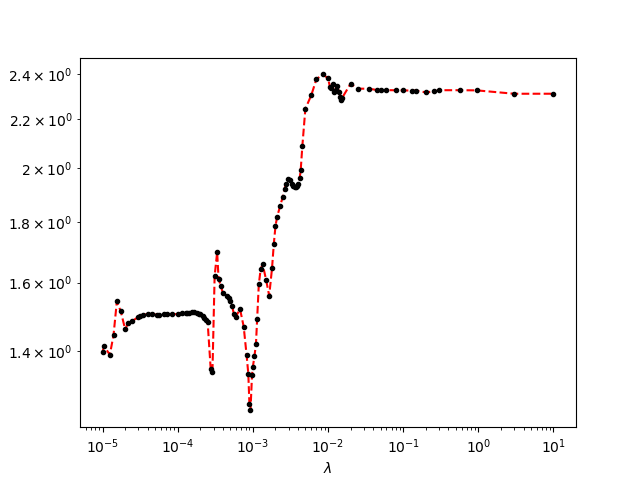

In [4]:
plt.figure()
plt.xlabel("$\lambda$")
plt.ylabel("$\sigma$")
plt.loglog(cond.lambdas,np.real(cond.conductivities),'r--')
plt.loglog(cond.lambdas,np.real(cond.conductivities),'k.')

In [5]:
def mrn_pollack(r):
    P0=0.005e-4
    if(r>=5e-4):
        return 0.
    if(r<5e-4):
        if(r>=1e-4):
            return (1/P0)**2*(P0/r)**5.5
        if(r<1e-4):
            if(r>=P0):
                return (P0/r)**3.5
            if(r<P0):
                return 1.
            
def sizes_distr(smin,smax,ndust):
    sdust = np.zeros(ndust)
    sdb=np.logspace(np.log10(smin),np.log10(smax),ndust+1)
    for i in range(ndust):
        sdust[i]=np.sqrt(sdb[i]*sdb[i+1])
    return [sdust,sdb]

ndust=500 #number of dust species
smin =2.5e-7 # Min grain size
smax=5e-4 # Max grain size

epsilon_0=0.013986 #Dust-to-gas ratio from Semenov
sdust,sdb=sizes_distr(smin,smax,ndust) 

rho_n=np.zeros(ndust)  
for j in range(0,ndust):
    rho_n[j]=mrn_pollack(sdust[j])

In [6]:
dist=op.dustDistribution(sdust,rho_n)

In [7]:
opacities=op.opacity(length=113)

In [8]:
opacities.data

array([0.00000000e+000, 5.97819431e-322, 2.20077942e-314, 2.17797744e-314,
       0.00000000e+000, 0.00000000e+000,             nan, 0.00000000e+000,
       2.12199579e-314, 0.00000000e+000, 4.44659081e-323, 2.24970748e-314,
       2.17646451e-314,             nan, 0.00000000e+000,             nan,
       2.22836193e-314, 2.12199579e-314, 3.55727265e-322, 3.45845952e-323,
       2.24970748e-314, 2.17646461e-314, 0.00000000e+000, 4.94065646e-324,
       4.94065646e-324, 2.22836193e-314, 2.12199579e-314, 7.11454530e-322,
       1.48219694e-323, 2.24970748e-314, 2.17646461e-314, 0.00000000e+000,
       4.94065646e-324, 4.94065646e-324, 4.94065646e-323, 4.94065646e-324,
       1.06718180e-321, 4.44659081e-323, 2.24970748e-314, 2.17646464e-314,
       0.00000000e+000, 1.97626258e-323, 4.94065646e-324, 0.00000000e+000,
       2.12199579e-314, 1.42290906e-321, 4.44659081e-323, 2.24970748e-314,
       2.17646465e-314, 4.44659081e-323, 1.97626258e-323, 4.94065646e-324,
       0.00000000e+000, 2

In [9]:
opacities.calculate_opacity(grainProperties=cond, dustDistribution=dist)

In [10]:
opacities.data

array([4.48424415e+08, 3.80672646e+08, 1.96001489e+08, 2.80207382e+08,
       1.44453266e+08, 3.42167783e+07, 2.84529021e+07, 2.45897012e+07,
       1.71653885e+07, 9.42275581e+06, 7.71991451e+06, 5.20490520e+06,
       3.07537239e+06, 1.97408351e+06, 1.16576309e+06, 9.40961839e+05,
       6.48797972e+05, 4.74714659e+05, 3.34095745e+05, 2.37904733e+05,
       1.82873546e+05, 1.43878498e+05, 1.34343661e+05, 1.24955283e+05,
       1.06667734e+05, 9.14649928e+04, 7.79650965e+04, 7.11357326e+04,
       6.55363312e+04, 5.83661086e+04, 5.34247912e+04, 5.11253068e+04,
       4.65889479e+04, 5.66042685e+04, 2.64058861e+05, 2.80535781e+05,
       3.95132413e+04, 3.19043854e+04, 2.84806114e+04, 2.69563383e+04,
       2.74813744e+04, 2.11689593e+04, 1.89343534e+04, 1.74146028e+04,
       1.87938645e+04, 3.13004015e+04, 2.07748691e+04, 1.46688159e+04,
       1.67688923e+04, 2.74003667e+04, 3.76815441e+04, 8.04668152e+04,
       8.96614974e+04, 9.12776921e+04, 9.33009829e+04, 1.01799284e+05,
      

<IPython.core.display.Javascript object>


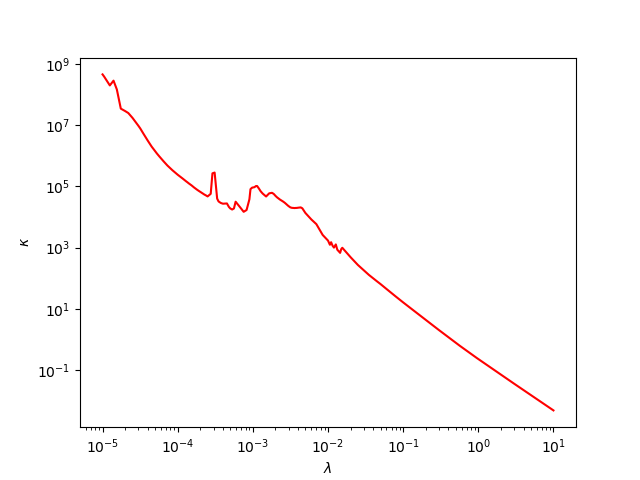

In [14]:
plt.figure()
plt.xlabel("$ \lambda $")
plt.ylabel("$\kappa$")
plt.loglog(cond.lambdas,opacities.data,'r')
